In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.linalg as linalg
import numpy as np
import scipy as scp

# Apply BFN on noisy linear systems

We will carry out the excersize on the following equation
The system is well described in, e.g., https://en.wikipedia.org/wiki/Lorenz_system

We will use the following parameter values:

$$
\sigma = 10 \,, \ \beta = ⁠8/3\,, \ \rho = 28 \,.
$$



In [10]:

def fx(x,y,z,t): return (sigma*(y-x))
def fy(x,y,z,t): return (x*(rho-z)-y)
def fz(x,y,z,t): return (x*y-beta*z)

def fx_neg(x,y,z,t): return -1*(sigma*(y-x))
def fy_neg(x,y,z,t): return -1*(x*(rho-z)-y)
def fz_neg(x,y,z,t): return -1*(x*y-beta*z)
#a) Defining the classical Runge-Kutta 4th order method

def RungeKutta4_forward(x,y,z,fx,fy,fz,t,h):
    k1x,k1y,k1z = ( h*f(x,y,z,t) for f in (fx,fy,fz) )
    # print( k1x,k1y,k1z)
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k1x,k1y,k1z,h)) )
    k2x,k2y,k2z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k2x,k2y,k2z,h)) )
    k3x,k3y,k3z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+kr for r,kr in zip((x,y,z,t),(k3x,k3y,k3z,h)) )
    k4x,k4y,k4z  =( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    # print((r for r in (x,y,z)))
    return (r+(k1r+2*k2r+2*k3r+k4r)/6 for r,k1r,k2r,k3r,k4r in 
            zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))

def RungeKutta4_backward(x,y,z,fx,fy,fz,t,h):
    k1x,k1y,k1z = ( h*f(x,y,z,t) for f in (fx,fy,fz) )
    # print( k1x,k1y,k1z)
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k1x,k1y,k1z,h)) )
    k2x,k2y,k2z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k2x,k2y,k2z,h)) )
    k3x,k3y,k3z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+kr for r,kr in zip((x,y,z,t),(k3x,k3y,k3z,h)) )
    k4x,k4y,k4z  =( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    # print((r for r in (x,y,z)))
    return (r-(k1r+2*k2r+2*k3r+k4r)/6 for r,k1r,k2r,k3r,k4r in 
            zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))



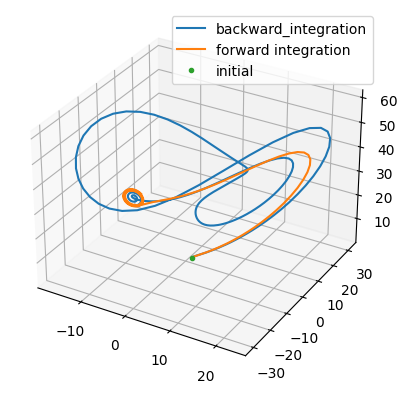

In [9]:
sigma=10.
beta=8./3.
rho=28.
tIn=3.
tFin=0.
h=-0.01
totalSteps=int(np.floor((tFin-tIn)/h))

t = totalSteps * [0.0]
x = totalSteps * [0.0]
y = totalSteps * [0.0]
z = totalSteps * [0.0]

x[0],y[0],z[0],t[0] = 1., 1., 1., 0.  #Initial condition
for i in range(1, totalSteps):
    x[i],y[i],z[i] = RungeKutta4_backward(x[i-1],y[i-1],z[i-1], fx_neg,fy_neg,fz_neg, t[i-1], -h)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y,z, "-", label="backward_integration")

tIn=0.
tFin=3.
h=0.01
totalSteps=int(np.floor((tFin-tIn)/h))
x[0],y[0],z[0],t[0] = 1., 1., 1., 0.  #Initial condition
for i in range(1, totalSteps):
    x[i],y[i],z[i] = RungeKutta4_forward(x[i-1],y[i-1],z[i-1], fx,fy,fz, t[i-1], h)

# ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y,z, "-", label="forward integration")
ax.plot([1.],[1.],[1.],".",label="initial")
plt.legend()

In [ ]:
def generate_true(xin, tin, pars):
  x = tin * [0.0]
  y = tin * [0.0]
  z = tin * [0.0]
  beta,sigma,rho = pars
  x[0],y[0],z[0],t[0] = xin[0], xin[1], xin[2], tin[0]  #Initial condition
  for i in range(1, len(tin)):
    dt= tin[i]- tin[i-1]
    x[i],y[i],z[i] = RungeKutta4_forward(x[i-1],y[i-1],z[i-1], fx,fy,fz, t[i-1], dt)
      
  list_of_vec= [[x[i], y[i], z[i]] for i in range(len(t))]
  return np.array(list_of_vec)
  

def nudge_forward(xin, time, pars, K, y_obs, H):

  store_vec= []
  # a, b, d, g = pars
  # x, y = xin
  vec= xin
  for t in range(1, len(time)):
    store_vec.append(vec)
    
    dt= time[t]-time[t-1]
    x,y,z= RungeKutta4_forward(vec[0],vec[1],vec[2], fx,fy,fz, time[t-1], dt)
    vec_new= np.array([x,y,z])
    gain_vec= K*H.T@R_inv@(y_obs[t].T- H@vec_new.T)

    gain_vec_dt= np.array(dt*gain_vec)[0]
    # print(dt*dvec)
    vec= vec_new + gain_vec_dt
    
  store_vec.append(vec)

  return np.array(store_vec)

def nudge_backward(x_tilda, time, pars, K_prime, y_obs, H):

  store_vec= []
  vec= x_tilda.copy()
  
  for t in range(len(time)-1, 0, -1):
    store_vec.append(vec)
    
    dt= (-time[t]+time[t-1])

    x,y,z= RungeKutta4_backward(vec[0],vec[1],vec[2], fx_neg,fy_neg,fz_neg, time[i-1], -dt)
    
    vec_new= np.array([x,y,z])
    gain_vec= K_prime*H.T@R_inv@(y_obs[t].T- H@vec_new.T)
    gain_vec_dt= np.array(dt*gain_vec)[0]
    # print(dt*dvec)
    vec= vec_new - gain_vec_dt
    
  store_vec.append(vec)

  return np.flip(store_vec, axis=0)


def back_forth_nudge(pars, t, K, K_back, H, y_obs, number_of_iterations): #once
  store_backward, store_forward=[], []
  #tilta, normal
  xin= np.mean(y_obs, axis=0)
  nudge= nudge_forward(xin, t, pars, K, y_obs, H)
  store_forward.append(nudge)
  for it in range(number_of_iterations):
    nudge_back= nudge_backward(nudge[-1], t, pars, K_back, y_obs, H)
    nudge= nudge_forward(nudge_back[0], t, pars, K, y_obs, H)
    store_backward.append(nudge_back)
    store_forward.append(nudge)
  return store_forward, store_backward

In [49]:
def rmse(x, y):
    return np.sqrt(np.mean(np.square(x-y)))

def given_true_traj_rmse(xtraj, xtrue):
    
    rmse_x=rmse(xtraj[:,0], xtrue[:,0])
    rmse_y=rmse(xtraj[:,1], xtrue[:,1])
    rmse_z=rmse(xtraj[:,2], xtrue[:,2])
    
    rmse_v= np.array([rmse_x, rmse_y, rmse_z])
    return rmse_v

def given_true_traj_rmse_t(xtraj, xtrue):
    rmse_t=[]
    for i in range(len(xtraj)):
        rmse_v= rmse(xtraj, xtrue)
        rmse_t.append(rmse_v)
    return rmse_t

Generating the y_obs based on a fixed covariance matrix and observational operator.

Model parameters,
$$R=\begin{bmatrix}
1 &  1 & 0\\
1& 2 & 0\\
0& 0 & 2\\
\end{bmatrix}, H=\begin{bmatrix}
1 &  0 & 0\\
0& 1 & 0\\
0& 0 & 1\\
\end{bmatrix}$$

In [ ]:
cov_obs= np.array([[1.,1.,0.],
                   [1.,2.,0.],
                   [0.,0., 2.]])
R_inv= np.eye(3)#np.linalg.inv(cov_obs)

t = np.linspace(0,6,10000)
xin= np.array([-5.34895656, -1.15005592, 28.92088666])
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)
H= np.eye(3)

r = 1

xtrue= generate_true(xin, t, pars)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = H.dot(xtrue[i]) + 2*np.random.multivariate_normal(mean= [0,0,0], cov= cov_obs)


For now, we take k=50.0, k'=100.0.

We have chosen our forward and backward gain matrices, as given in the paper,

$$K=kH^{T}, K'=k'H^{T}$$

In [46]:
# setting R_inv to identity, explained later
R_inv= np.eye(3)#np.linalg.inv(cov_obs)

K, K_back= 50,100

store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 20)

In [47]:
x_nonudge= generate_true(y_obs[0], t, pars)

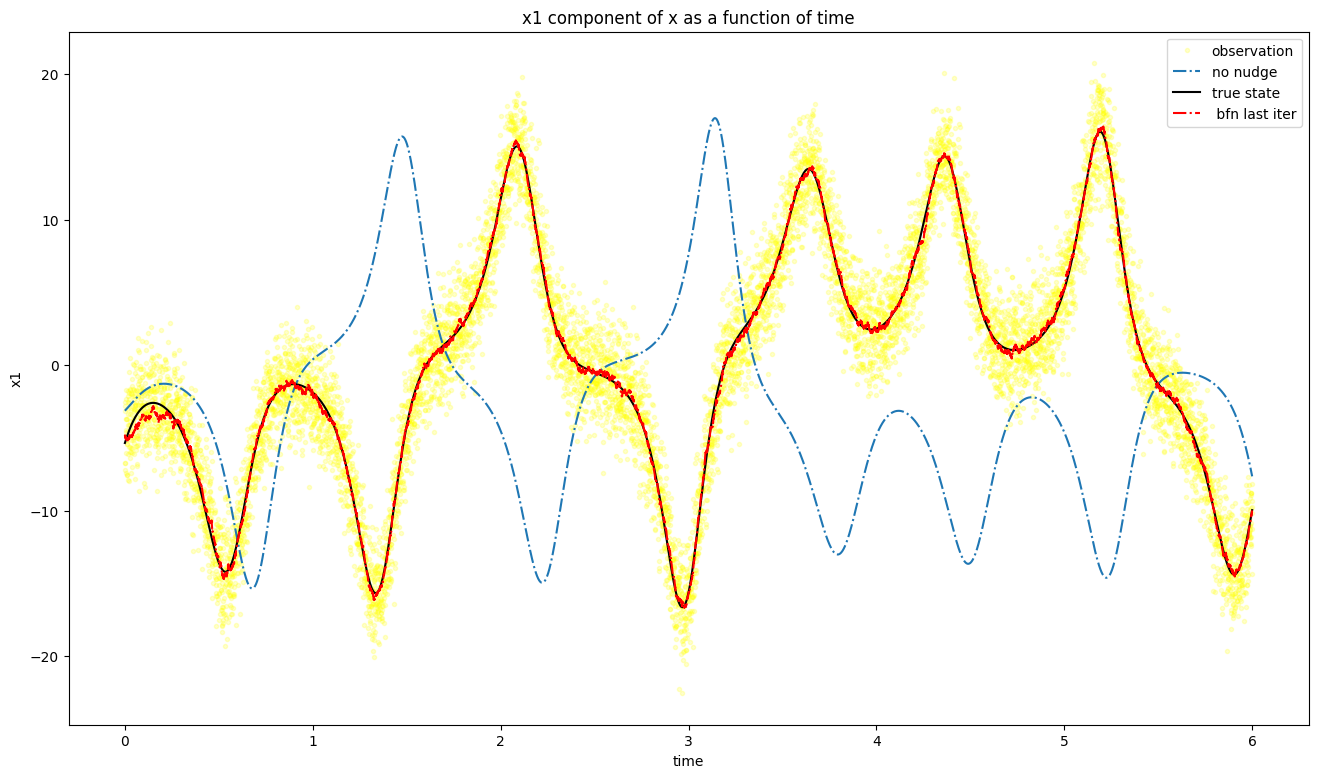

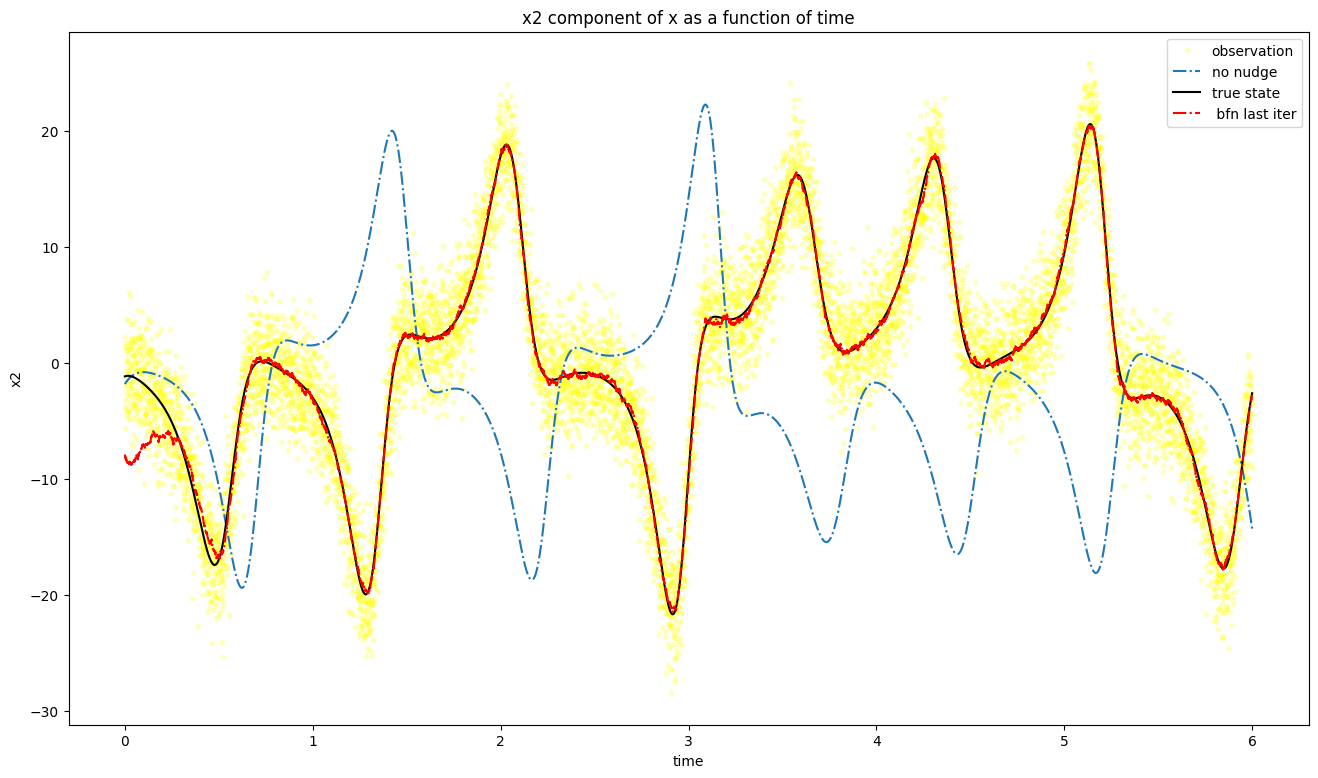

Text(0, 0.5, 'x3')

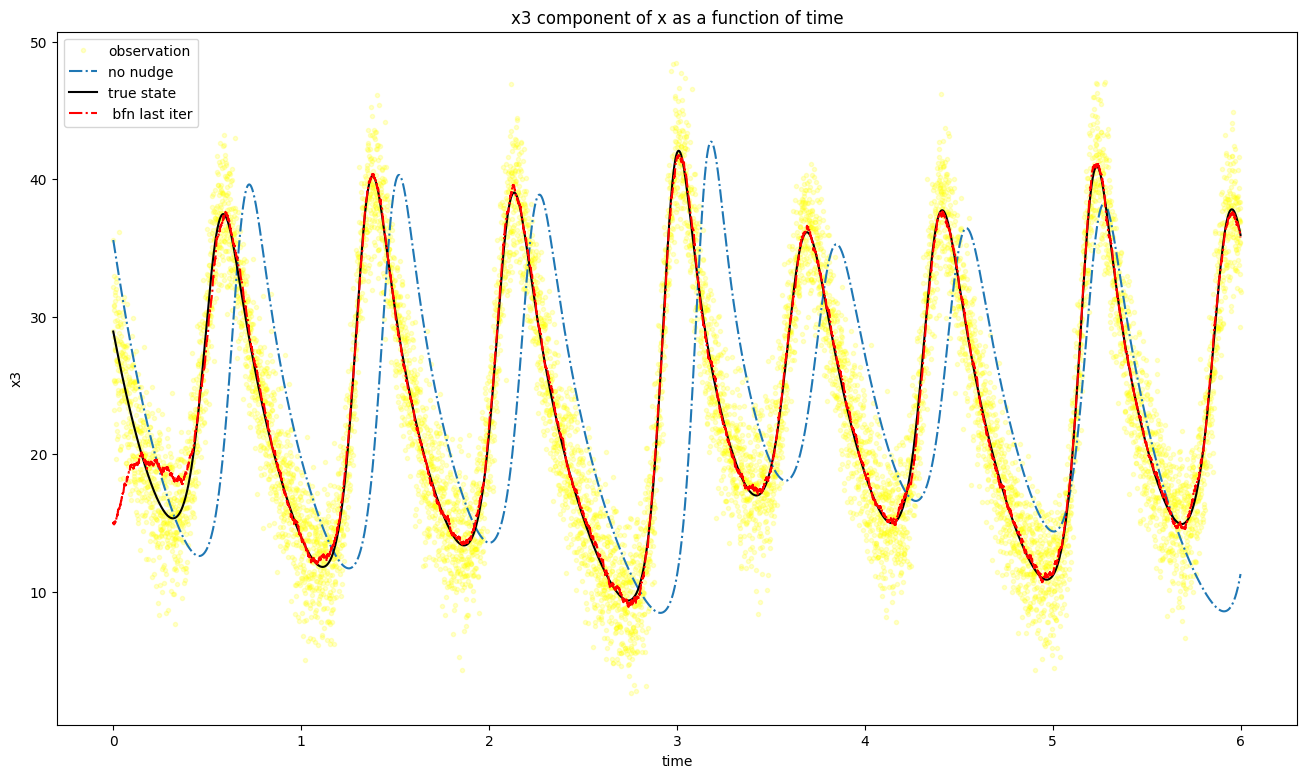

In [48]:
plt.figure(figsize= (16,9))
it= 0
plt.plot(t, y_obs[:,it], ".", alpha=0.2, label="observation", color="yellow")
plt.plot(t, x_nonudge[:,it], "-.", label= "no nudge")

plt.plot(t, xtrue[:,it], label= "true state", color= "black")
plt.plot(t, store_for[-1][:,it], "-.", label=" bfn last iter", color= "red")
# plt.plot(t, store_back[-1][:,0], "-.")
plt.legend()
plt.title(f"x{it+1} component of x as a function of time")
plt.xlabel("time"); plt.ylabel(f"x{it+1}")
plt.show()

plt.figure(figsize= (16,9))
it= 1
plt.plot(t, y_obs[:,it], ".", alpha=0.2, label="observation", color="yellow")
plt.plot(t, x_nonudge[:,it], "-.", label= "no nudge")

plt.plot(t, xtrue[:,it], label= "true state", color= "black")
plt.plot(t, store_for[-1][:,it], "-.", label=" bfn last iter", color="red")
# plt.plot(t, store_back[-1][:,0], "-.")
plt.legend()
plt.title(f"x{it+1} component of x as a function of time")
plt.xlabel("time"); plt.ylabel(f"x{it+1}")
plt.show()

plt.figure(figsize= (16,9))
it= 2
plt.plot(t, y_obs[:,it], ".", alpha=0.2, label="observation", color="yellow")
plt.plot(t, x_nonudge[:,it], "-.", label= "no nudge")

plt.plot(t, xtrue[:,it], label= "true state", color= "black")
plt.plot(t, store_for[-1][:,it], "-.", label=" bfn last iter", color="r")
# plt.plot(t, store_back[-1][:,0], "-.")
plt.legend()
plt.title(f"x{it+1} component of x as a function of time")
plt.xlabel("time"); plt.ylabel(f"x{it+1}")


Text(0, 0.5, 'rmse')

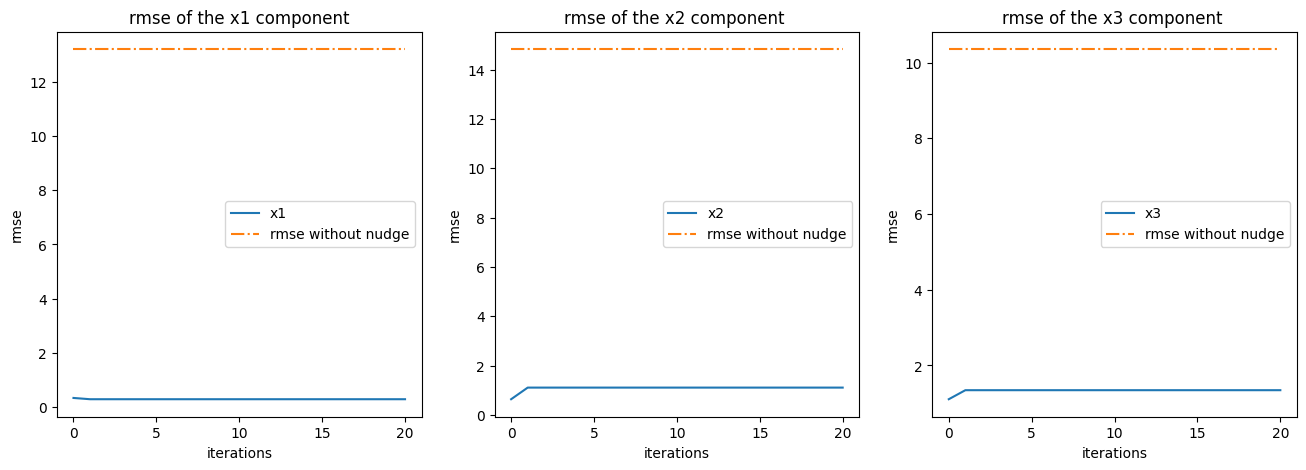

In [50]:
rmse_iter= np.array([given_true_traj_rmse(traj[:], xtrue[:]) for traj in store_for])
rmse_no_nudge= np.array([given_true_traj_rmse(x_nonudge[:], xtrue[:])] * len(rmse_iter))

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(rmse_iter[:,0], label="x1")
plt.plot(rmse_no_nudge[:,0], "-.",label="rmse without nudge")
plt.legend()
plt.title("rmse of the x1 component")
plt.xlabel("iterations")
plt.ylabel("rmse")
# plt.show()
plt.subplot(1,3,2)
plt.plot(rmse_iter[:,1], label="x2")
plt.plot(rmse_no_nudge[:,1], "-.",label="rmse without nudge")
plt.legend()
plt.title("rmse of the x2 component ")
plt.xlabel("iterations")
plt.ylabel("rmse")

plt.subplot(1,3,3)
plt.plot(rmse_iter[:,2], label="x3")
plt.plot(rmse_no_nudge[:,2], "-.",label="rmse without nudge")
plt.legend()
plt.title("rmse of the x3 component ")
plt.xlabel("iterations")
plt.ylabel("rmse")

BFN coverges and gives much lower rmse than null